<a href="https://colab.research.google.com/github/saharshhhh/DeepLearning/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras


In [4]:
data= pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df=pd.DataFrame(data)

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.drop('customerID', inplace=True, axis=1)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
for col in df.columns:
  print(f"{col}: {df[col].nunique()} ")

gender: 2 
SeniorCitizen: 2 
Partner: 2 
Dependents: 2 
tenure: 73 
PhoneService: 2 
MultipleLines: 3 
InternetService: 3 
OnlineSecurity: 3 
OnlineBackup: 3 
DeviceProtection: 3 
TechSupport: 3 
StreamingTV: 3 
StreamingMovies: 3 
Contract: 3 
PaperlessBilling: 2 
PaymentMethod: 4 
MonthlyCharges: 1585 
TotalCharges: 6531 
Churn: 2 


In [10]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [11]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

df_cat = df[categorical_cols].copy()

scaler = LabelEncoder()
for col in categorical_cols:
    df[col] = scaler.fit_transform(df_cat[col])

display(df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [12]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64


In [13]:
df.replace('No internet service','No',inplace=True)

In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
minmax = MinMaxScaler()
df['tenure'] = minmax.fit_transform(df[['tenure']])
df['MonthlyCharges'] = minmax.fit_transform(df[['MonthlyCharges']])
df['TotalCharges'] = minmax.fit_transform(df[['TotalCharges']])

display(df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462,1


<Axes: >

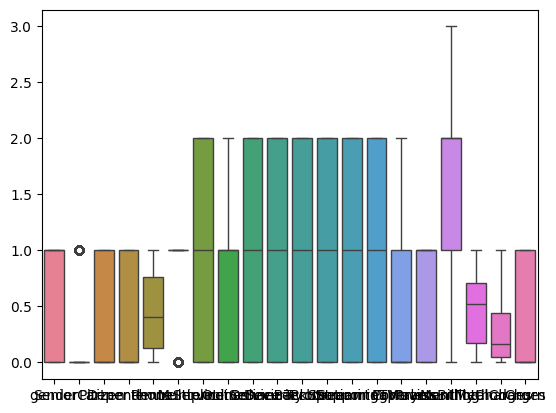

In [15]:
sns.boxplot(df)

In [16]:
y=df['Churn']
X=df.drop('Churn',axis=1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from keras.layers import Dense
model=keras.Sequential()
model.add(Dense(units=19, activation='relu', input_dim=19))
keras.layers.Dropout(0.2)
model.add(Dense(units=38, activation='relu'))
keras.layers.Dropout(0.2)
model.add(Dense(units=19, activation='relu'))
keras.layers.Dropout(0.2)
model.add(Dense(units=3, activation='relu'))
keras.layers.Dropout(0.2)
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50,batch_size=20, validation_split=0.2,verbose=1)

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6690 - loss: 0.2292 - val_accuracy: 0.7215 - val_loss: 0.1663
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7610 - loss: 0.1507 - val_accuracy: 0.7758 - val_loss: 0.1525
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7876 - loss: 0.1430 - val_accuracy: 0.7794 - val_loss: 0.1490
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7977 - loss: 0.1386 - val_accuracy: 0.7820 - val_loss: 0.1466
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7996 - loss: 0.1383 - val_accuracy: 0.7865 - val_loss: 0.1456
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8010 - loss: 0.1409 - val_accuracy: 0.7945 - val_loss: 0.1439
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7995 - loss: 0.1384 - val_accuracy: 0.7998 - val_loss: 0.1430
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8051 - loss: 0.1379 - val_accuracy: 0.

In [22]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8057 - loss: 0.1385


[0.14143845438957214, 0.7985765337944031]

In [23]:
yp=model.predict(X_test)
yp[:20]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[0.3429105 ],
       [0.33121437],
       [0.1245447 ],
       [0.00629118],
       [0.084664  ],
       [0.00873174],
       [0.0049314 ],
       [0.02547513],
       [0.19697815],
       [0.03129816],
       [0.00869039],
       [0.21460567],
       [0.00811154],
       [0.23642643],
       [0.21967404],
       [0.01513494],
       [0.39929625],
       [0.09487075],
       [0.00746881],
       [0.7263389 ]], dtype=float32)

In [24]:
y_test[:20]

,Churn
3918,1
2467,0
2885,0
3770,0
3753,0
4493,0
2178,0
2481,0
1569,0
1611,0


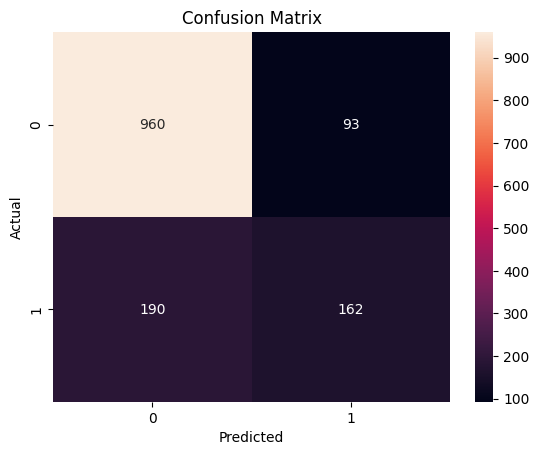

In [25]:
from sklearn.metrics import confusion_matrix

yp_binary = (yp > 0.5).astype(int)

cm = confusion_matrix(y_test, yp_binary)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()